# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [2]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [16]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

# Przy size = 10000 występował błąd na moim komputerze o treści:
# MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 10000) and data type float64
# Dlatego usunąłem tę wartość

for size in [100, 1000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
197 µs ± 38.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 872.58 MiB, increment: 0.00 MiB


SIZE:  1000
Timing: 
26.7 ms ± 3.78 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 893.14 MiB, increment: 20.56 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.


In [17]:
#Tworzę zmienne do liczenia blędów
s1, s2 = 3, 3.14
l1, l2 = [3, 4, 5], [3.33, 4.44, 5.55]
m1 = np.array([[3, 4, 5], [6, 7, 8], [9, 10, 11]])
m2 = np.array([[3.33, 4.44, 5.55], [6.66, 7.77, 8.88], [9.99, 10.10, 11.11]])

#Korzystając z napisanych funkcji wyświetlam błąd bezwględny i błąd względny 
print('Błąd bezwględny dla wartości skalarnej: \n', main.absolut_error(s1, s2))
print('Błąd bezwględny dla list i wektorów: \n', main.absolut_error(l1, l2))
print('Błąd bezwględny dla macierzy: \n', main.absolut_error(m1, m2))

print('Błąd wględny dla wartości skalarnej: \n', main.relative_error(s1, s2))
print('Błąd wględny dla list i wektorów: \n', main.relative_error(l1, l2))
print('Błąd wględny dla macierzy: \n', main.relative_error(m1, m2))

Błąd bezwględny dla wartości skalarnej: 
 0.14000000000000012
Błąd bezwględny dla list i wektorów: 
 [0.33 0.44 0.55]
Błąd bezwględny dla macierzy: 
 [[0.33 0.44 0.55]
 [0.66 0.77 0.88]
 [0.99 0.1  0.11]]
Błąd wględny dla wartości skalarnej: 
 0.04666666666666671
Błąd wględny dla list i wektorów: 
 [0.11 0.11 0.11]
Błąd wględny dla macierzy: 
 [[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.01 0.01]]


***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
    - W każdym przypadku powinniśmy otrzymać 0, ponieważ dodawanie jest naprzemienne
2. Które z liczb mają skończoną a które nieskończoną reprezentację?
    - Patrząc na wykresy niżej, można zauważyć, że skończoną reprezentację mają liczby 0.125, 0.25 oraz 0.5, zaś nieskończoną liczby 0.1, 0.33, 0.6
3. Dlaczego wyniki się od siebie różnią?
    - Wyniki różnią się w bardzo małym stopniu (w odległych miejscach po przecinku), wynika to z błędu zaokrąglenia i odcięcia
4. Jaki typ błędu tutaj występuje?
    - Występuje tutaj błąd ocięcia i zaokrąglenia
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób? 
    - W tym przypadku najprawdopodobniej najlepszą metodą będzie stosowanie zaokrągleń

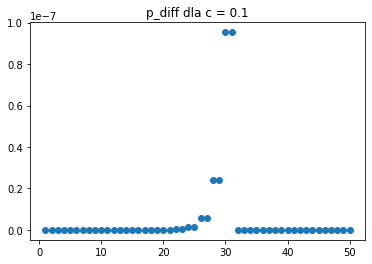

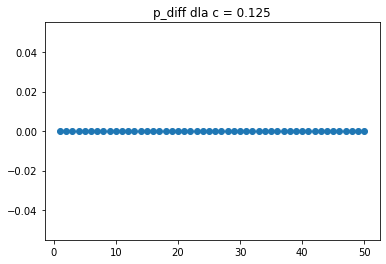

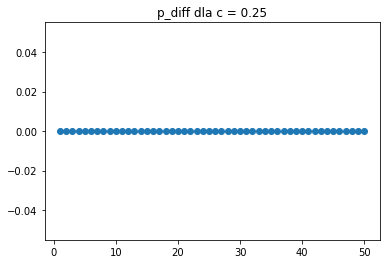

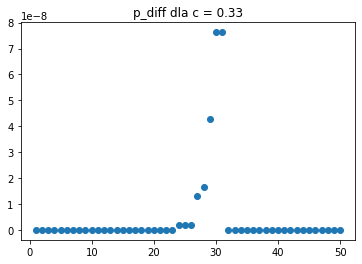

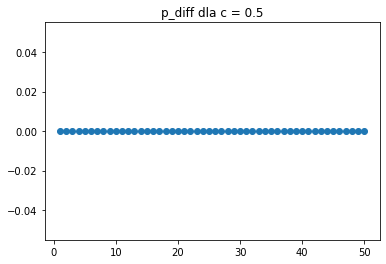

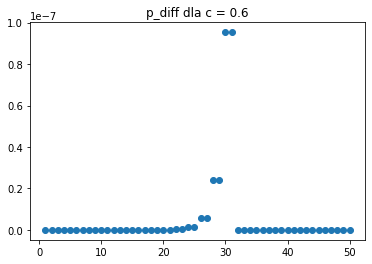

In [18]:
# Na podstawie danych tworzę wykresy funkcji zależnych od zmiennych c i n
n = []
for i in range(1, 51):
    n.append(i)

fc1 = []
for i in range(1, 51):
    fc1.append(main.p_diff(i, 0.1))
plt.figure(1)
plt.scatter(n, fc1, label = 'p_diff dla c = 0.1')
plt.title('p_diff dla c = 0.1')
plt.show(1)

fc2 = []
for i in range(1, 51):
    fc2.append(main.p_diff(i, 0.125))
plt.figure(2)
plt.scatter(n, fc2, label = 'p_diff dla c = 0.125')
plt.title('p_diff dla c = 0.125')
plt.show(2)

fc3 = []
for i in range(1, 51):
    fc3.append(main.p_diff(i, 0.25))
plt.figure(3)
plt.scatter(n, fc3, label = 'p_diff dla c = 0.25')
plt.title('p_diff dla c = 0.25')
plt.show(3)

fc4 = []
for i in range(1, 51):
    fc4.append(main.p_diff(i, 0.33))
plt.figure(4)
plt.scatter(n, fc4, label = 'p_diff dla c = 0.33')
plt.title('p_diff dla c = 0.33')
plt.show(4)

fc5 = []
for i in range(1, 51):
    fc5.append(main.p_diff(i, 0.5))
plt.figure(5)
plt.scatter(n, fc5, label = 'p_diff dla c = 0.5')
plt.title('p_diff dla c = 0.5')
plt.show(5)

fc6 = []
for i in range(1, 51):
    fc6.append(main.p_diff(i, 0.6))
plt.figure(6)
plt.scatter(n, fc6, label = 'p_diff dla c = 0.6')
plt.title('p_diff dla c = 0.6')
plt.show(6)


 

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
    - Omawiany przykład przedstawia błąd obcięcia, który jest widoczny przy większych wartościach dokładności N
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.
    - Wraz ze wzrostem wartości n obniżają się wartości błędów względnych i bezwględnych

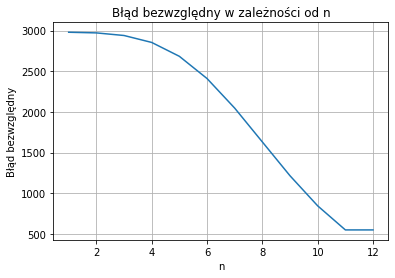

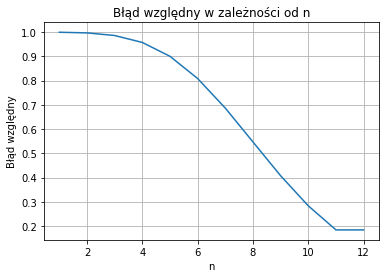

In [13]:
# Przygotowywuję przykładowe dane:
x = 8
n = 12

# Tworzę listy wartości dla funkcji exponential oraz listy zawierające błędy względne i bezwzględne 
exp_x = np.exp(x)
vec = []

for elem in range(1, n + 1):
    vec.append(elem)
    
result_exp = []

for elem in range(1, n + 1):
    result_exp.append(main.exponential(x, elem))
    
abs_error = []

for i in result_exp:
    abs_error.append(main.absolut_error(exp_x, i))

rel_error = []

for i in result_exp:
    rel_error.append(main.relative_error(exp_x, i))
    
# Tworzę wykresy wartości błędów względnego i bezwzględnego

# Wykres błędów bezwzględnych

plt.figure(1)
plt.plot(vec, abs_error)
plt.title('Błąd bezwzględny w zależności od n')
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.grid()
plt.show(1)

# Wykres błędów względnych

plt.figure(2)
plt.plot(vec, rel_error)
plt.title('Błąd względny w zależności od n')
plt.xlabel('n')
plt.ylabel('Błąd względny')
plt.grid()
plt.show(2)

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [3]:
# Przygotowywuję przykładowe dane
k1 = 0
k2 = 1
k3 = 2
k4 = 10

x = 1/2

print('Funkcja cosinus z biblioteki numpy: ')
print('Cosinus z wartością ', k1, '*', x, ' wynosi: ', np.cos(k1*x))
print('Cosinus z wartością ', k2, '*', x, ' wynosi: ', np.cos(k2*x))
print('Cosinus z wartością ', k3, '*', x, ' wynosi: ', np.cos(k3*x))
print('Cosinus z wartością ', k4, '*', x, ' wynosi: ', np.cos(k4*x))

print('Funkcja coskx1: ')
print('Cosinus z wartością ', k1, '*', x, ' wynosi: ', main.coskx1(k1, x))
print('Cosinus z wartością ', k2, '*', x, ' wynosi: ', main.coskx1(k2, x))
print('Cosinus z wartością ', k3, '*', x, ' wynosi: ', main.coskx1(k3, x))
print('Cosinus z wartością ', k4, '*', x, ' wynosi: ', main.coskx1(k4, x))

print('Funkcja coskx2: ')
print('Cosinus z wartością ', k1, '*', x, ' wynosi: ', main.coskx2(k1, x)[0])
print('Cosinus z wartością ', k2, '*', x, ' wynosi: ', main.coskx2(k2, x)[0])
print('Cosinus z wartością ', k3, '*', x, ' wynosi: ', main.coskx2(k3, x)[0])
print('Cosinus z wartością ', k4, '*', x, ' wynosi: ', main.coskx2(k4, x)[0])

Funkcja cosinus z biblioteki numpy: 
Cosinus z wartością  0 * 0.5  wynosi:  1.0
Cosinus z wartością  1 * 0.5  wynosi:  0.8775825618903728
Cosinus z wartością  2 * 0.5  wynosi:  0.5403023058681398
Cosinus z wartością  10 * 0.5  wynosi:  0.28366218546322625
Funkcja coskx1: 
Cosinus z wartością  0 * 0.5  wynosi:  1.0
Cosinus z wartością  1 * 0.5  wynosi:  0.8775825618903728
Cosinus z wartością  2 * 0.5  wynosi:  0.5403023058681398
Cosinus z wartością  10 * 0.5  wynosi:  0.2836621854632251
Funkcja coskx2: 
Cosinus z wartością  0 * 0.5  wynosi:  1.0
Cosinus z wartością  1 * 0.5  wynosi:  0.8775825618903728
Cosinus z wartością  2 * 0.5  wynosi:  0.5403023058681398
Cosinus z wartością  10 * 0.5  wynosi:  0.2836621854632262


Wyniki otrzymane za pomocą funkcji z biblioteki numpy, jak i z napisanych przeze mnie funkcji są praktycznie takie same (różnica w coskx1 dla k = 10 w 15 miejscu po przecinku).
Świadczy to o poprawnym działaniu napisanych funkcji oraz dużej dokładności wykonywanych obliczeń

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
    - Mamy tutaj do czynienia z błędami zakrągleń i odcięcia
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  
    - Rozwiązanie poniżej
    
**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

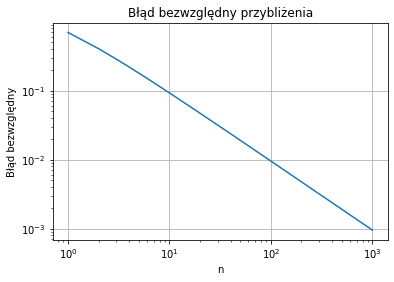

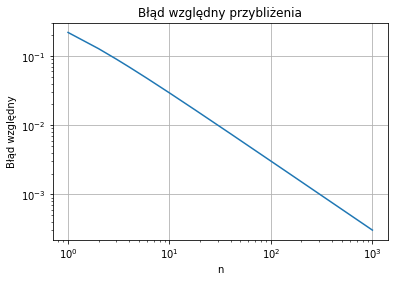

In [3]:
# Przygotowywuje dane do sporządzenia wykresów
n = 1000 # n - możemy zmieniać
vec = []
for i in range(1, n+1):
    vec.append(i)
    
my_pi = []

for i in range(1, n+1):
    my_pi.append(main.pi(i))
    
abs_error = []

for i in my_pi:
    abs_error.append(main.absolut_error(np.pi, i))
    
rel_error = []

for i in my_pi:
    rel_error.append(main.relative_error(np.pi, i))

# Wykres błędów bezwzględnych

plt.figure(1)
plt.loglog(vec, abs_error)
plt.title('Błąd bezwzględny przybliżenia')
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.grid()
plt.show(1)

# Wykres błędów względnych

plt.figure(2)
plt.loglog(vec, rel_error)
plt.title('Błąd względny przybliżenia')
plt.xlabel('n')
plt.ylabel('Błąd względny')
plt.grid()
plt.show(2)

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

169 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.69 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
16.7 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[0.00016864947714285717, 0.00168954504285714, 0.016693926142857165]


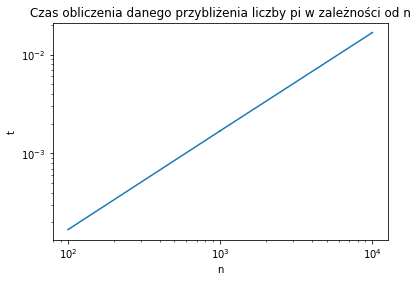

In [6]:
# Wykonanie testow czasowych
n = [100, 1000, 10000]
s_time1 = %timeit -o main.pi(n[0])
s_time2 = %timeit -o main.pi(n[1])
s_time3 = %timeit -o main.pi(n[2])

# Srednia czasu wykonania testow
t = [s_time1.average, s_time2.average, s_time3.average]
print(t)

# Wykres w skali logarytmicznej z errorbarami
plt.figure(1)
plt.loglog(n, t)
plt.errorbar(n[0], t[0], yerr=s_time1.stdev)
plt.errorbar(n[1], t[1], yerr=s_time2.stdev)
plt.errorbar(n[2], t[2], yerr=s_time3.stdev)
plt.title('Czas obliczenia danego przybliżenia liczby pi w zależności od n')
plt.xlabel('n')
plt.ylabel('t')
plt.show(1)

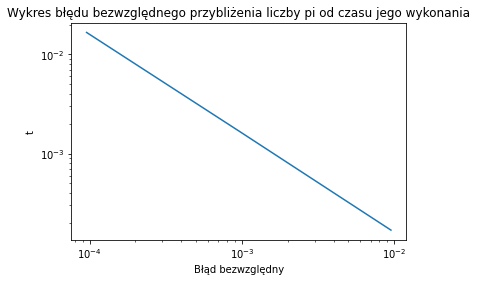

In [7]:
# Wyliczanie błędów bezwzględnych
abs1 = main.absolut_error(np.pi, main.pi(n[0]))
abs2 = main.absolut_error(np.pi, main.pi(n[1]))
abs3 = main.absolut_error(np.pi, main.pi(n[2]))

pi_abs = [abs1, abs2, abs3]

# Wykres w skali logarytmicznej
plt.figure(2)
plt.loglog(pi_abs, t)
plt.title('Wykres błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania')
plt.xlabel('Błąd bezwzględny')
plt.ylabel('t')
plt.show(2)
